In [1]:
import math
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path

from ResultsManager import Results, ResultsManager

In [2]:
# COMPARING THE EFFICIENCY IN TRAINING OF full, naive AND sym - FORWARD, BACKWARD, TOTAL
# All numbers were generated on a A100 GPU (with SXM4)
# time is in seconds, memory is in MB

# k=10
# kq_dim=10
# val_dim=10
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --do_backward --method full 
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --do_backward --method naive
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --do_backward --method sym
# uv run profiling-experiment.py --kq_dim 10 --val_dim 10 --do_backward --method flash_attn --dtype fp16

sqrt10 = np.sqrt(10)
Ns_complete = [1e2, sqrt10*1e2, 1e3, sqrt10*1e3, 1e4, sqrt10*1e4, 1e5, sqrt10*1e5, 1e6, sqrt10*1e6, 1e7, sqrt10*1e7, 1e8]
Ns_complete = [int(N) for N in Ns_complete]

# larger N gave OOM
full_forward_means = [np.float64(0.0007480621337890625), np.float64(0.0007499217987060547), np.float64(0.0007565498352050781), np.float64(0.0007925987243652344), np.float64(0.002689552307128906), np.float64(0.02436370849609375)]
full_forward_stds = [np.float64(2.3396917875013108e-05), np.float64(1.0423664640964945e-05), np.float64(3.244364422620202e-05), np.float64(1.2924486233546186e-05), np.float64(6.984321608401993e-06), np.float64(0.0005563485032348102)]
full_backward_means = [np.float64(0.0010404586791992188), np.float64(0.000940704345703125), np.float64(0.0010402679443359375), np.float64(0.0014201641082763673), np.float64(0.007406377792358398), np.float64(0.04709978103637695)]
full_backward_stds = [np.float64(0.000130517481690536), np.float64(1.4420362984799042e-05), np.float64(5.3937512662739384e-05), np.float64(7.161367077250546e-05), np.float64(0.0031729905570456783), np.float64(0.0032763329136228938)]
full_total_means = [np.float64(0.0017885208129882813), np.float64(0.0016906261444091797), np.float64(0.0017968177795410155), np.float64(0.0022127628326416016), np.float64(0.010095930099487305), np.float64(0.0714634895324707)]
full_total_stds = [np.float64(0.00011574494950926931), np.float64(1.5179607461794635e-05), np.float64(6.334339699997992e-05), np.float64(6.209749088284007e-05), np.float64(0.003172706953448413), np.float64(0.0033043429475003976)]
full_memory_means = [np.float64(16.30419921875), np.float64(16.68017578125), np.float64(20.21923828125), np.float64(54.875), np.float64(399.2470703125), np.float64(3835.58642578125)]
full_memory_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
full_peak_means = [np.float64(16.4248046875), np.float64(17.83740234375), np.float64(31.70361328125), np.float64(169.4189453125), np.float64(1544.0390625), np.float64(15280.32470703125)]
full_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
full_results = Results(
    label="full attention",
    Ns=Ns_complete[:len(full_forward_means)],
    forward_means=full_forward_means,
    forward_stds=full_forward_stds,
    backward_means=full_backward_means,
    backward_stds=full_backward_stds,
    total_means=full_total_means,
    total_stds=full_total_stds,
    peak_means=full_peak_means,
    peak_stds=full_peak_stds
)

# larger N possible
sym_forward_means = [np.float64(0.001676321029663086), np.float64(0.001786947250366211), np.float64(0.0019258499145507813), np.float64(0.002228832244873047), np.float64(0.0031848907470703124), np.float64(0.006619930267333984), np.float64(0.03463387489318848), np.float64(0.23144640922546386), np.float64(2.1466090202331545), np.float64(20.95938024520874)]
sym_forward_stds = [np.float64(2.564125035780529e-05), np.float64(2.302338484152161e-05), np.float64(2.8706468207738272e-05), np.float64(5.770628047383042e-05), np.float64(0.00011469956812373445), np.float64(7.821728380064757e-05), np.float64(4.178056867109788e-05), np.float64(7.715198695982431e-05), np.float64(0.0007799400413917212), np.float64(0.003847627340645898)]
sym_backward_means = [np.float64(0.0009638309478759765), np.float64(0.000976896286010742), np.float64(0.0010127544403076172), np.float64(0.0010446548461914063), np.float64(0.0014066219329833985), np.float64(0.0018358230590820312), np.float64(0.0053064823150634766), np.float64(0.013278055191040038), np.float64(0.08633418083190918), np.float64(0.27271285057067873)]
sym_backward_stds = [np.float64(3.225675617008475e-05), np.float64(4.591835373291061e-05), np.float64(5.282236662419714e-05), np.float64(7.416214458751512e-05), np.float64(0.0002183391162761247), np.float64(0.00036459279065282707), np.float64(0.0018457919053530584), np.float64(0.005017637553437821), np.float64(0.0012689341120934448), np.float64(0.004080877741220477)]
sym_total_means = [np.float64(0.0026401519775390626), np.float64(0.002763843536376953), np.float64(0.0029386043548583984), np.float64(0.003273487091064453), np.float64(0.004591512680053711), np.float64(0.008455753326416016), np.float64(0.03994035720825195), np.float64(0.24472446441650392), np.float64(2.2329432010650634), np.float64(21.23209309577942)]
sym_total_stds = [np.float64(5.0536325942177456e-05), np.float64(4.865949726704007e-05), np.float64(5.8590190687454386e-05), np.float64(9.126145000355026e-05), np.float64(0.000133606708499665), np.float64(0.00035942411729891093), np.float64(0.0018691145441132129), np.float64(0.00498978458747347), np.float64(0.001559626747007354), np.float64(0.005355502215313305)]
sym_memory_means = [np.float64(0.1044921875), np.float64(0.32666015625), np.float64(1.033203125), np.float64(3.26025390625), np.float64(10.30224609375), np.float64(32.5712890625), np.float64(102.998046875), np.float64(325.70654296875), np.float64(1029.96826171875), np.float64(3257.04541015625)]
sym_memory_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
sym_peak_means = [np.float64(0.1865234375), np.float64(0.5810546875), np.float64(1.83642578125), np.float64(5.79541015625), np.float64(18.31494140625), np.float64(57.90478515625), np.float64(183.10791015625), np.float64(579.03369140625), np.float64(1831.0556640625), np.float64(5790.3037109375)]
sym_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
sym_results = Results(
    label="$k$-MIP attention: symbolic matrices",
    Ns=Ns_complete[:len(sym_forward_means)],
    forward_means=sym_forward_means,
    forward_stds=sym_forward_stds,
    backward_means=sym_backward_means,
    backward_stds=sym_backward_stds,
    total_means=sym_total_means,
    total_stds=sym_total_stds,
    peak_means=sym_peak_means,
    peak_stds=sym_peak_stds
)

# larger N possible 
naive_forward_means = [np.float64(0.002014493942260742), np.float64(0.0019963741302490234), np.float64(0.0020878791809082033), np.float64(0.0022046566009521484), np.float64(0.004960775375366211), np.float64(0.031756925582885745), np.float64(0.2632321357727051), np.float64(2.625576877593994), np.float64(26.674069309234618)]
naive_forward_stds = [np.float64(9.67591776528228e-06), np.float64(1.1929127734788542e-05), np.float64(9.640369085292672e-06), np.float64(2.499873090690252e-05), np.float64(2.020293257891403e-05), np.float64(1.6658209041128586e-05), np.float64(7.384614360127972e-05), np.float64(0.0012150938698082536), np.float64(0.007424259409665412)]
naive_backward_means = [np.float64(0.0011178970336914063), np.float64(0.0009989261627197266), np.float64(0.0010652542114257812), np.float64(0.0011209964752197266), np.float64(0.0013111591339111327), np.float64(0.0017248630523681641), np.float64(0.004835176467895508), np.float64(0.008710956573486328), np.float64(0.08616533279418945)]
naive_backward_stds = [np.float64(0.00012611097948620294), np.float64(4.2574482508251056e-05), np.float64(4.2509705044291134e-05), np.float64(6.773343852068406e-05), np.float64(0.00023529846405925022), np.float64(0.0004201617169340385), np.float64(0.002578576130825742), np.float64(0.004659136430477561), np.float64(0.0008029088311787938)]
naive_total_means = [np.float64(0.0031323909759521486), np.float64(0.00299530029296875), np.float64(0.0031531333923339845), np.float64(0.003325653076171875), np.float64(0.006271934509277344), np.float64(0.033481788635253903), np.float64(0.2680673122406006), np.float64(2.6342878341674805), np.float64(26.76023464202881)]
naive_total_stds = [np.float64(0.00013025611499614342), np.float64(4.1099490627193767e-05), np.float64(4.769787578146907e-05), np.float64(7.399129984173247e-05), np.float64(0.00023267144904404538), np.float64(0.0004273386146213941), np.float64(0.0025919588884091064), np.float64(0.004702983600244536), np.float64(0.007572888691329293)]
naive_memory_means = [np.float64(8.2294921875), np.float64(8.45166015625), np.float64(9.158203125), np.float64(11.38525390625), np.float64(18.42724609375), np.float64(40.6962890625), np.float64(111.123046875), np.float64(333.83154296875), np.float64(1038.09326171875)]
naive_memory_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
naive_peak_means = [np.float64(8.3115234375), np.float64(8.7060546875), np.float64(12.80712890625), np.float64(48.99755859375), np.float64(398.22216796875), np.float64(3865.58447265625), np.float64(36917.857421875), np.float64(36917.857421875), np.float64(36917.857421875)]
naive_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
naive_results = Results(
    label="$k$-MIP attention: naive",
    Ns=Ns_complete[:len(naive_forward_means)],
    forward_means=naive_forward_means,
    forward_stds=naive_forward_stds,
    backward_means=naive_backward_means,
    backward_stds=naive_backward_stds,
    total_means=naive_total_means,
    total_stds=naive_total_stds,
    peak_means=naive_peak_means,
    peak_stds=naive_peak_stds
)

# larger N gave OOM
flash_attn_forward_means = [np.float64(0.00019025802612304688), np.float64(0.00020837783813476562), np.float64(0.00021200180053710939), np.float64(0.00020241737365722656), np.float64(0.00032210350036621094), np.float64(0.0018354415893554687), np.float64(0.013112163543701172), np.float64(0.09226202964782715), np.float64(0.9156118392944336)]
flash_attn_forward_stds = [np.float64(1.0033995389986143e-05), np.float64(9.984018194810792e-06), np.float64(1.3789088525085638e-05), np.float64(4.264961199760036e-07), np.float64(6.805587240480161e-06), np.float64(6.102025326937253e-06), np.float64(5.353758075069683e-06), np.float64(0.00025103911779471164), np.float64(0.0005801966083821743)]
flash_attn_backward_means = [np.float64(0.0007888317108154297), np.float64(0.0007974147796630859), np.float64(0.0009270191192626953), np.float64(0.001083707809448242), np.float64(0.0015342235565185547), np.float64(0.006050300598144531), np.float64(0.040618085861206056), np.float64(0.2817854881286621), np.float64(2.7090603351593017)]
flash_attn_backward_stds = [np.float64(3.33617712916318e-05), np.float64(2.7404076661592405e-05), np.float64(4.919272695553472e-05), np.float64(4.536739084995591e-05), np.float64(6.655782490457478e-05), np.float64(0.0002981896660464996), np.float64(0.001731970730175342), np.float64(0.0041717852188636615), np.float64(0.013734077855639718)]
flash_attn_total_means = [np.float64(0.0009790897369384766), np.float64(0.0010057926177978516), np.float64(0.0011390209197998046), np.float64(0.0012861251831054687), np.float64(0.0018563270568847656), np.float64(0.0078857421875), np.float64(0.05373024940490723), np.float64(0.37404751777648926), np.float64(3.6246721744537354)]
flash_attn_total_stds = [np.float64(3.33822112174704e-05), np.float64(2.242584976686206e-05), np.float64(4.391993801692723e-05), np.float64(4.5502009365208356e-05), np.float64(6.990878336861158e-05), np.float64(0.00029887251575606654), np.float64(0.0017297566731380577), np.float64(0.003988892665860137), np.float64(0.014051491374763466)]
flash_attn_memory_means = [np.float64(0.0205078125), np.float64(0.06005859375), np.float64(0.18603515625), np.float64(0.5810546875), np.float64(1.83251953125), np.float64(5.79345703125), np.float64(18.3125), np.float64(57.90576171875), np.float64(183.10693359375)]
flash_attn_memory_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
flash_attn_peak_means = [np.float64(1.72509765625), np.float64(5.17041015625), np.float64(13.83349609375), np.float64(43.22900390625), np.float64(136.59619140625), np.float64(428.88037109375), np.float64(1352.43505859375), np.float64(4273.56103515625), np.float64(13512.50439453125)]
flash_attn_peak_stds = [np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0), np.float64(0.0)]
flash_results = Results(
    label="FlashAttention (fp16)",
    Ns=Ns_complete[:len(flash_attn_forward_means)],
    forward_means=flash_attn_forward_means,
    forward_stds=flash_attn_forward_stds,
    backward_means=flash_attn_backward_means,
    backward_stds=flash_attn_backward_stds,
    total_means=flash_attn_total_means,
    total_stds=flash_attn_total_stds,
    peak_means=flash_attn_peak_means,
    peak_stds=flash_attn_peak_stds,
)

In [3]:
results_manager = ResultsManager()
results_manager["full"] = full_results
results_manager["naive"] = naive_results
results_manager["sym"] = sym_results
results_manager["flash"] = flash_results

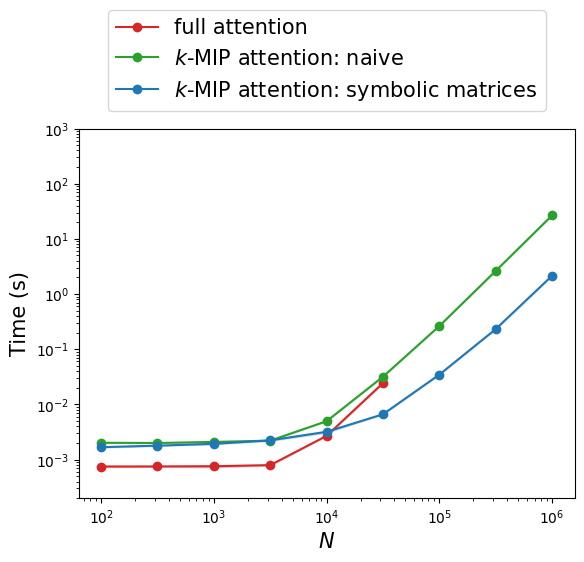

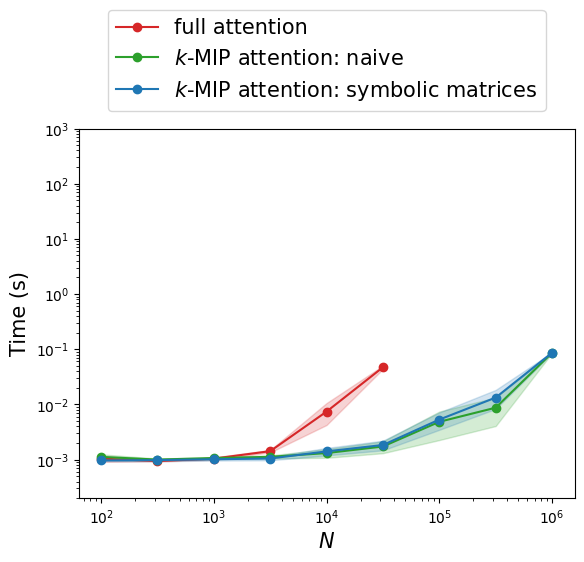

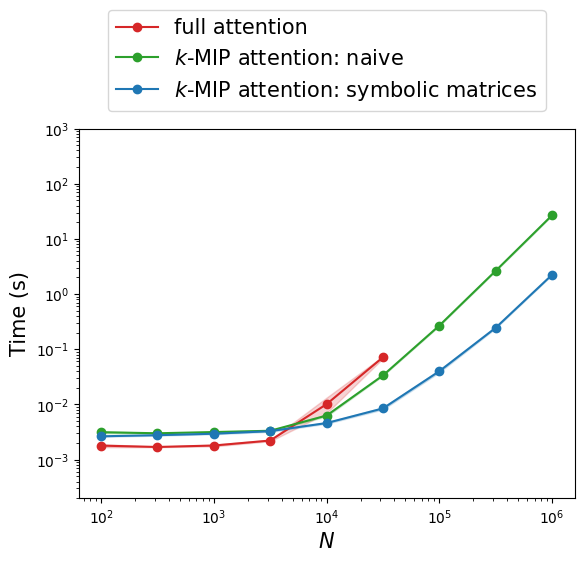

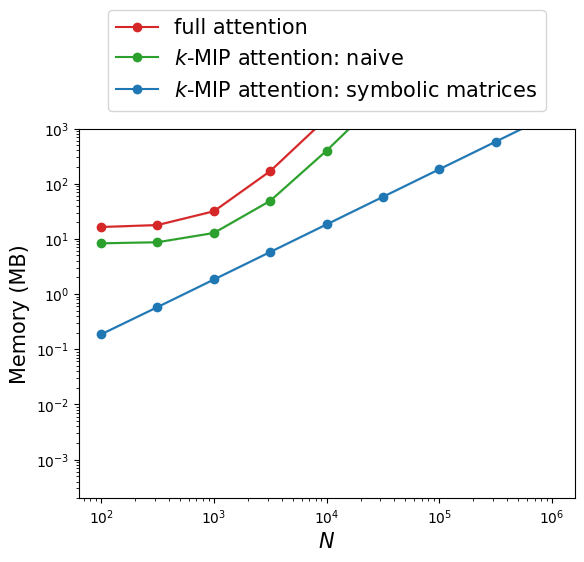

In [ ]:
results_manager.display_settings.display_flash = False
results_manager.display_settings.max_N = 1e6
results_manager.display_settings.ylim = [2e-4, 1e3]


results_manager.show_forward(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-forward.png'),
    show_legend=True
)

results_manager.show_backward(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-backward.png'),
    show_legend=True
)

results_manager.show_total(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-total.png'),
    show_legend=True
)

results_manager.display_settings.ylim = None
results_manager.show_peak(
    save_path=Path('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-peak.png'),
    show_legend=True
)


ValueError: x and y must have same first dimension, but have shapes (9,) and (6,)

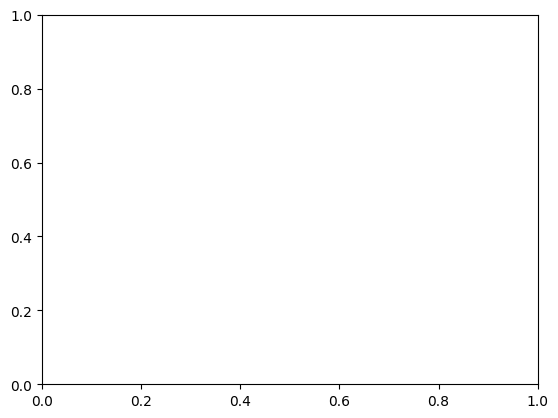

In [ ]:

# plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-forward.png', bbox_inches='tight')
# plt.show()


# # plot: all backward means +- stds

# fig = plt.figure()

# # plt.errorbar(NsTo(len(full_backward_means)), full_backward_means, yerr=full_backward_stds, label="full attention", fmt='o')
# # plt.errorbar(NsTo(len(naive_backward_means)), naive_backward_means, yerr=naive_backward_stds, label="$k$-MIP attention: naive", fmt='o')
# # plt.errorbar(NsTo(len(sym_backward_means)), sym_backward_means, yerr=sym_backward_stds, label="$k$-MIP attention: symbolic matrices", fmt='o')

# plt.plot(NsTo(len(full_backward_means)), full_backward_means, label="full attention", marker='o', color=colors['full'))
# plt.fill_between(NsTo(len(full_backward_means)), np.array(full_backward_means) - np.array(full_backward_stds), np.array(full_backward_means) + np.array(full_backward_stds), alpha=0.2, color=colors['full'))
# plt.plot(NsTo(len(naive_backward_means)), naive_backward_means, label="$k$-MIP attention: naive", marker='o', color=colors['naive'))
# plt.fill_between(NsTo(len(naive_backward_means)), np.array(naive_backward_means) - np.array(naive_backward_stds), np.array(naive_backward_means) + np.array(naive_backward_stds), alpha=0.2, color=colors['naive'))
# plt.plot(NsTo(len(sym_backward_means)), sym_backward_means, label="$k$-MIP attention: symbolic matrices", marker='o', color=colors['sym'))
# plt.fill_between(NsTo(len(sym_backward_means)), np.array(sym_backward_means) - np.array(sym_backward_stds), np.array(sym_backward_means) + np.array(sym_backward_stds), alpha=0.2, color=colors['sym'))
# if display_flash:
#     plt.plot(NsTo(len(flash_attn_backward_means)), flash_attn_backward_means, label="flash attention (fp16)", marker='o', color=colors['flash'))
#     plt.fill_between(NsTo(len(flash_attn_backward_means)), np.array(flash_attn_backward_means) - np.array(flash_attn_backward_stds), np.array(flash_attn_backward_means) + np.array(flash_attn_backward_stds), alpha=0.2, color=colors['flash'))

# # plt.title('backward pass')
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim(ylim)
# plt.xlabel('N', fontsize=axis_fontsize)
# # plt.ylabel('time (s)')
# plt.legend(loc='upper center', fontsize=legend_fontsize, bbox_to_anchor=(0.5, bbox_y), ncol=1)

# plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-backward.png', bbox_inches='tight')
# plt.show()


# plot: all total means +- stds

fig = plt.figure()

# plt.errorbar(NsTo(len(full_total_means)), full_total_means, yerr=full_total_stds, label="full attention", fmt='o')
# plt.errorbar(NsTo(len(naive_total_means)), naive_total_means, yerr=naive_total_stds, label="$k$-MIP attention: naive", fmt='o')
# plt.errorbar(NsTo(len(sym_total_means)), sym_total_means, yerr=sym_total_stds, label="$k$-MIP attention: symbolic matrices", fmt='o')

plt.plot(NsTo(len(full_total_means)), full_total_means, label="full attention", marker='o', color=colors['full'])
plt.fill_between(NsTo(len(full_total_means)), np.array(full_total_means) - np.array(full_total_stds), np.array(full_total_means) + np.array(full_total_stds), alpha=0.2, color=colors['full'])
plt.plot(NsTo(len(naive_total_means)), naive_total_means, label="$k$-MIP attention: naive", marker='o', color=colors['naive'])
plt.fill_between(NsTo(len(naive_total_means)), np.array(naive_total_means) - np.array(naive_total_stds), np.array(naive_total_means) + np.array(naive_total_stds), alpha=0.2, color=colors['naive'])
plt.plot(NsTo(len(sym_total_means)), sym_total_means, label="$k$-MIP attention: symbolic matrices", marker='o', color=colors['sym'])
plt.fill_between(NsTo(len(sym_total_means)), np.array(sym_total_means) - np.array(sym_total_stds), np.array(sym_total_means) + np.array(sym_total_stds), alpha=0.2, color=colors['sym'])
if display_flash:
    plt.plot(NsTo(len(flash_attn_total_means)), flash_attn_total_means, label="flash attention (fp16)", marker='o', color=colors['flash'])
    plt.fill_between(NsTo(len(flash_attn_total_means)), np.array(flash_attn_total_means) - np.array(flash_attn_total_stds), np.array(flash_attn_total_means) + np.array(flash_attn_total_stds), alpha=0.2, color=colors['flash'])

# plt.title('total')
plt.xscale('log')
plt.yscale('log')
plt.ylim(ylim)
plt.xlabel('N', fontsize=axis_fontsize)
plt.ylabel('time (s)', fontsize=axis_fontsize)
plt.legend(loc='upper center', fontsize=legend_fontsize, bbox_to_anchor=(0.5, bbox_y), ncol=1)

plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-total.png', bbox_inches='tight')

plt.show()




# plot: all peak means +- stds

fig = plt.figure()

plt.plot(NsTo(len(full_peak_means)), full_peak_means, label="full attention", marker='o', color=colors['full'])
plt.fill_between(NsTo(len(full_peak_means)), np.array(full_peak_means) - np.array(full_peak_stds), np.array(full_peak_means) + np.array(full_peak_stds), alpha=0.2, color=colors['full'])
plt.plot(NsTo(len(naive_peak_means)), naive_peak_means, label="$k$-MIP attention: naive", marker='o', color=colors['naive'])
plt.fill_between(NsTo(len(naive_peak_means)), np.array(naive_peak_means) - np.array(naive_peak_stds), np.array(naive_peak_means) + np.array(naive_peak_stds), alpha=0.2, color=colors['naive'])
plt.plot(NsTo(len(sym_peak_means)), sym_peak_means, label="$k$-MIP attention: symbolic matrices", marker='o', color=colors['sym'])
plt.fill_between(NsTo(len(sym_peak_means)), np.array(sym_peak_means) - np.array(sym_peak_stds), np.array(sym_peak_means) + np.array(sym_peak_stds), alpha=0.2, color=colors['sym'])
if display_flash:
    plt.plot(NsTo(len(flash_attn_peak_means)), flash_attn_peak_means, label="flash attention (fp16)", marker='o', color=colors['flash'])
    plt.fill_between(NsTo(len(flash_attn_peak_means)), np.array(flash_attn_peak_means) - np.array(flash_attn_peak_stds), np.array(flash_attn_peak_means) + np.array(flash_attn_peak_stds), alpha=0.2, color=colors['flash'])

# plt.title('peak')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N', fontsize=axis_fontsize)
plt.ylabel('GPU memory (MB)', fontsize=axis_fontsize)
plt.legend(loc='upper center', fontsize=legend_fontsize, bbox_to_anchor=(0.5, bbox_y), ncol=1)

plt.savefig('/home/jonas/ICML-thesis-submission/figures/Efficiency-training-peak.png', bbox_inches='tight')

plt.show()